#Sobre o projeto

**Tema:** Análise de dados

**Autores:**

Cauê Vinícius dos Santos

Diogo Ágabo Leão De Brito

Fabiana Paula Araujo

Guilherme Matheus de Morais Souza

Laura Luiza da Silva Moura

Tais Florenço de Jesus

Vinicius Pereira da Silva

**Título do trabalho:** Acidentes aéreos ocorridos no Brasil de 2010 a 2019.

**Objetivo do trabalho:** Elaborar uma análise de dados sobre ocorrências aeronáuticas notificadas ao Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA) entre 2010 a 2019 e que ocorreram em solo brasileiro.

*São resguardadas a privacidade de pessoas físicas/jurídicas envolvidas conforme previsto pela Lei de Acesso à Informação (Lei n° 12.527, de 18 de novembro de 2011).*

**Observação: Ajuste o diretório do arquivo de dados (xlsx), você pode salvar o arquivo na nuvem e informar o link ou pode fazer o upload diretamente no Google Colab caso esteja utilizando esta plataforma para execução do projeto. No Google Colab o arquivo .xlsx pode ser salvo na pasta /content/ exemplo: acidentes_aereos = pd.read_excel('/content/ocorrencias_cenipa.xlsx')**



#Biblioteca para importar o Dataset do seu Google Drive

Execute a função abaixo para montar o Dataset a partir do seu Google Drive. Se você fizer o upload do Dataset diretamente na pasta "/content", não será necessário executar este bloco de código.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Bibliotecas necessárias que não fazem parte do Google Colab por padrão

Para a execução do projeto é necessário executar a função abaixo para que instale as bibliotecas que não são padrões do Google Colab.

Utils - Esta biblioteca contém uma coleção de funções utilitárias e objetos. Mais detalhes em: https://pypi.org/project/utils/

Python-Utils - Python Utils é uma coleção de pequenas funções e classes Python que tornam os padrões comuns mais curtos e fáceis. Não é, de forma alguma, uma coleção completa, mas me serviu bastante no passado e continuarei ampliando-a. A documentação está disponível em: https://python-utils.readthedocs.org/en/latest/

Category Encoders - Category_encoders é um conjunto de transformadores no estilo scikit-learn para codificar variáveis categóricas em numéricos por meio de diferentes técnicas. A documentação está disponível em: https://contrib.scikit-learn.org/category_encoders/

In [237]:
!pip install utils
!pip install python-utils
!pip install category_encoders

#Bibliotecas utilizadas no projeto e suas funções

* Pandas é um pacote Python que fornece estruturas de dados rápidas, flexíveis e expressivas projetadas para tornar o trabalho com dados "relacionais" ou "rotulados" fácil e intuitivo. A documentação está disponível em: https://pandas.pydata.org/docs/getting_started/overview.html

* Numpy é uma biblioteca Python que fornece um objeto de matriz multidimensional, vários objetos derivados (como matrizes mascaradas e matrizes), e uma variedade de rotinas para operações rápidas em matrizes, incluindo matemática, lógica, manipulação de forma, classificação, seleção, I/O, transformações originais de Fourier, álgebra linear básica, operações estatísticas básicas, simulação aleatória e muito mais. A documentação está disponível em: https://numpy.org/doc/stable/user/whatisnumpy.html

* Matplotlib é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python. A documentação está disponível em: https://matplotlib.org/stable/index.html#

* A biblioteca Plotly faz gráficos interativos de qualidade de publicação que suporta mais de 40 tipos de gráficos únicos cobrindo uma ampla gama de casos de uso estatístico, financeiro, geográfico, científico e tridimensional. A documentação está disponível em: https://plotly.com/python/

* Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib. Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. A documentação está disponível em: https://towardsdatascience.com/seaborn-python-8563c3d0ad41

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import category_encoders as ce
from category_encoders.one_hot import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
import plotly.express as px
from matplotlib.pyplot import figure, show
from seaborn import countplot
%matplotlib inline
acidentes_aereos = pd.read_excel('/content/ocorrencias_cenipa.xlsx')
#acidentes_aereos = pd.read_excel('/content/drive/My Drive/ocorrencias_cenipa.xlsx')
acidentes_aereos.head()



,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,1,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,1,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,1,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


# Quantidade por tipo de ocorrências

A seguir é possível observar as quantidades de cada tipo de ocorrências aéreas. Conclui-se que incidentes (casos mais leves) são os que ocorrem com maior frequência.

Preparação dos dados e visualização do gráfico:

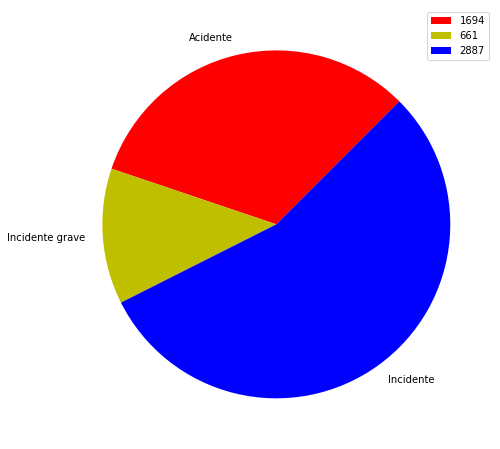

In [239]:
tipos = []

for acda in acidentes_aereos['tipo'].unique():
  tipos.append((int(str((acidentes_aereos['tipo'][acidentes_aereos['tipo'] == acda].count())))))

y = np.array(tipos)
plt.figure(figsize=(8,8))

rotulos = ['Acidente', 'Incidente grave', 'Incidente']
afastamento = [0.0, 0.0, 0.0]
cores = ['r', 'y', 'b']
plt.pie(
    y, 
    labels=rotulos, 
    startangle=45, 
    explode=afastamento, 
    colors=cores
    )
plt.legend(y)
plt.show()

#Análise da descrição dos acidentes

Analisando o gráfico abaixo, conclui-se que, de todos os tipos de acidentes, a falha do motor durante o voo tem sido a maior causa das ocorrências aéreas, seguido do estouro do pneu do avião. A explosão da aeronave durante o voo é a que menos ocorre.

Preparação dos dados:

In [ ]:
acidentes_aereos_freq = {}

for acda in acidentes_aereos['descricao'].unique():
    
    acidentes_aereos_freq[acda] = acidentes_aereos['descricao'][
                               acidentes_aereos['descricao'] == acda
                                ].count()  /acidentes_aereos['descricao'].count()
    
descricao_acda = pd.Series(acidentes_aereos_freq)

#descricao_acda.head(10)


Visualização do gráfico:

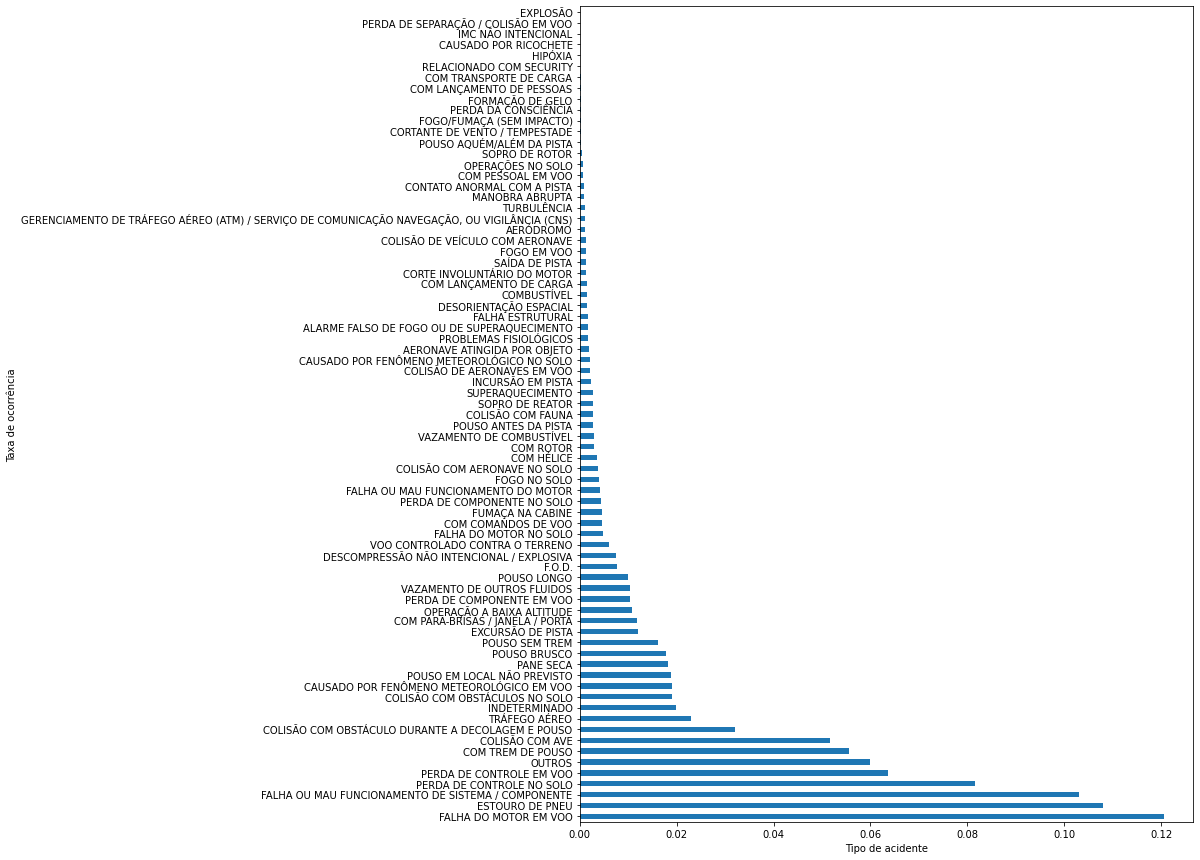

In [ ]:

fig, axes = plt.subplots(figsize=(11,15))

descricao_acda.sort_values(ascending=False).plot(kind='barh')

axes.set_xlabel('Tipo de acidente')
axes.set_ylabel('Taxa de ocorrência')
                   
plt.show()
plt.close()

#Estados que mais sofrem com acidentes aéreos

O gráfico abaixo representa todas as ocorrências aéreas decada estado brasileiro. Conclui-se São Paulo que é o estado com mais ocorrências aéreas (1239), seguido de Minas Gerais (482). Amapá foi o estado com o tráfego aéreo mais seguro, registrando apenas 9 ocorrências.

Preparação dos dados:

In [ ]:
 for acda in acidentes_aereos['estado'].unique():  
  print(acda + ' :' +
          str(acidentes_aereos['estado'][
              acidentes_aereos['estado'] == acda].count()))


In [ ]:
acidentes_aereos_estado = {}  
for acda in acidentes_aereos['estado'].unique(): 
  acidentes_aereos_estado[acda] = acidentes_aereos['estado'][
                               acidentes_aereos['estado'] == acda
                                ].count()
    
estado_acda = pd.Series(acidentes_aereos_estado)

Visualização do gráfico:

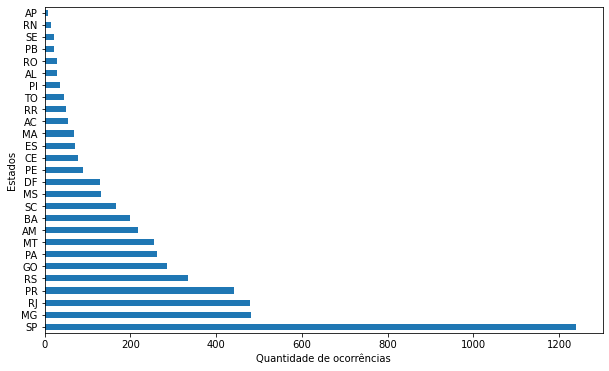

In [ ]:
fig, axes = plt.subplots(figsize=(10.,6.))

estado_acda.sort_values(ascending=False).plot(kind='barh')

axes.set_xlabel('Quantidade de ocorrências')
axes.set_ylabel('Estados')
                   
plt.show()
plt.close()

#Quantidade de aeronaves envolvidas por nível de dano

O gráfico abaixo mostra a quantidade de aeronaves que se envolveram em algum tipo de acidente e o nivel de dano que elas obtiveram. Conclui-se que a maioria das aeronaves não tiveram danos, seguido de danos leves, e a minoria delas foi relatado danos indeterminados.

Preparação dos dados:

In [ ]:
acidentes_modelo= pd.DataFrame(acidentes_aereos.groupby(['aeronave_nivel_dano']).sum()['aeronaves_envolvidas']).unstack()

Visualização do gráfico:

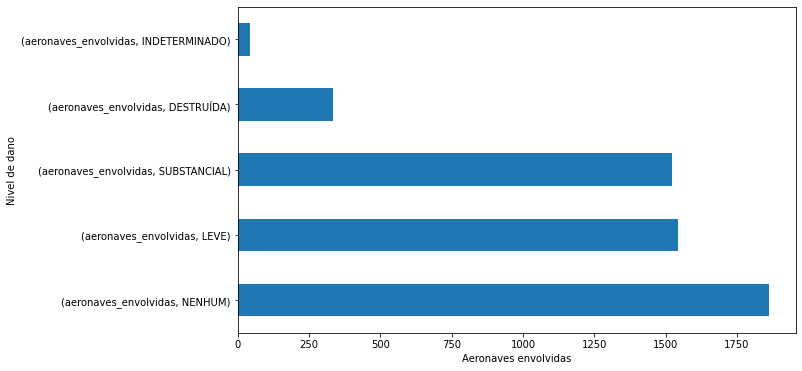

In [ ]:
fig, axes = plt.subplots(figsize=(10.,6.))

acidentes_modelo.sort_values(ascending=False).plot(kind='barh')

axes.set_xlabel('Aeronaves envolvidas')
axes.set_ylabel('Nivel de dano')
                   
plt.show()
plt.close()

Média, Moda, Media e Desvio Padrão das aeronaves envolvidas:

In [ ]:
acidentes_modelo.describe()

count       5.000000
mean     1060.800000
std       814.616597
min        43.000000
25%       333.000000
50%      1521.000000
75%      1544.000000
max      1863.000000
dtype: float64

# Ocorrências por modelo de motor

A seguir o gráfico apresentará as ocorrências por modelos de motor, e conclui-se que o Brasil é o fabricante com mais ocorrências por modelo de motor.

Preparação dos dados:

In [ ]:
one_hot_enc = OneHotEncoder(cols=['aeronave_liberada'])

In [ ]:
orc_enc = OrdinalEncoder(cols=['tipo', 'estado', 'descricao','cidade', 'motor_tipo','aeronave_motor_quantidade','aeronave_fabricante'])

In [ ]:
dados_acidentes_cats_ohe = one_hot_enc.fit_transform(acidentes_aereos)

In [ ]:
dados_acidentes_tratado=orc_enc.fit_transform(dados_acidentes_cats_ohe)

In [ ]:
quantidade_de_motor = acidentes_aereos[['aeronave_motor_quantidade', 'aeronaves_envolvidas','aeronave_pais_fabricante']].groupby(['aeronave_motor_quantidade','aeronave_pais_fabricante'], as_index = True).sum()

Visualização do gráfico:

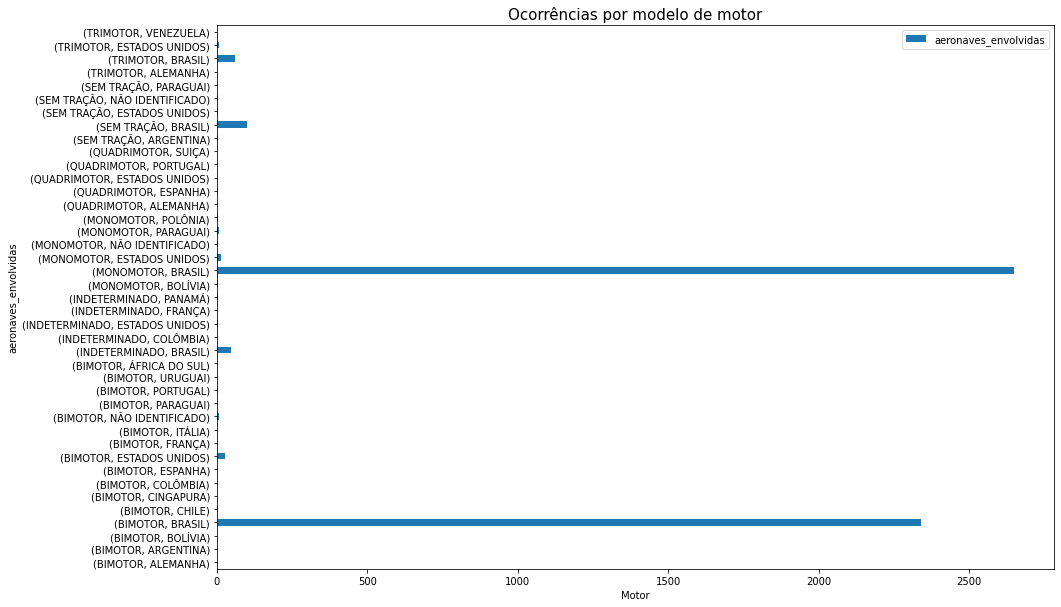

In [ ]:
quantidade_de_motor.plot(kind='barh')
plt.rcParams['figure.figsize'] = (15,10)
plt.title('Ocorrências por modelo de motor', fontdict={'fontsize': 15})
plt.xlabel('Motor')
plt.ylabel('aeronaves_envolvidas')
plt.show()



Valores em porcentagem:

Observa-se que o Brasil lidera com 98% a taxa de ocorrências por motor

In [ ]:
acidentes_aereos_fab = {}

for acda in acidentes_aereos['aeronave_pais_fabricante'].unique():
    
    acidentes_aereos_fab[acda] = (acidentes_aereos['aeronave_pais_fabricante'][
                               acidentes_aereos['aeronave_pais_fabricante'] == acda
                                ].count()  /acidentes_aereos['aeronave_pais_fabricante'].count())*100
    
fabricante_acda = pd.Series(acidentes_aereos_fab)

fabricante_acda.head()

BRASIL            98.035101
ESTADOS UNIDOS     0.934758
PARAGUAI           0.152614
BOLÍVIA            0.076307
PANAMÁ             0.038153
dtype: float64

Média, Moda, Media e Desvio Padrão

In [ ]:
quantidade_de_motor.describe()

,aeronaves_envolvidas
count,41.000000
mean,129.365854
std,543.905771
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,2650.000000


# Mediana de assentos por ano e tipo de ocorrência

O gráfico a seguir mostra a mediana de assentos por ano e por tipo de ocorrência, por exemplo, em 2010 nas ocorrências do tipo ACIDENTE as aeronaves possuiam a mediana de 4 assentos.


Preparação dos dados:

In [ ]:
acidentes_por_ano = acidentes_aereos[['ano','tipo','aeronave_assentos']].groupby(['tipo', 'ano'], as_index = False).median()

Visualização do gráfico:

In [ ]:
px.bar(acidentes_por_ano, x = 'ano', y = 'aeronave_assentos', color = 'tipo', title='Tipo de acidente por mediana de assentos ')

Média, moda, media e desvio padrão de acidentes por Ano:

In [ ]:
acidentes_por_ano.describe()

,ano,aeronave_assentos
count,30.000000,30.000000
mean,2014.500000,5.050000
std,2.921384,2.379329
min,2010.000000,2.000000
25%,2012.000000,2.500000
50%,2014.500000,5.500000
75%,2017.000000,6.875000
max,2019.000000,10.000000


# Acidentes ocorridos por ano

O gráfico abaixo mostra a quantidade de acidentes ocorridos por ano. Conclui-se que 2012 e 2013 foram os anos com maior ocorrências aéreas. 2016 foi o ano com menos ocorrências.

Preparação dos dados:

In [ ]:
acidentes_aereos['data'] = pd.to_datetime(acidentes_aereos['data'])
acidentes_ano = acidentes_aereos['Ano'] = acidentes_aereos['data'].map(lambda x: x.year)

Visualização do gráfico:

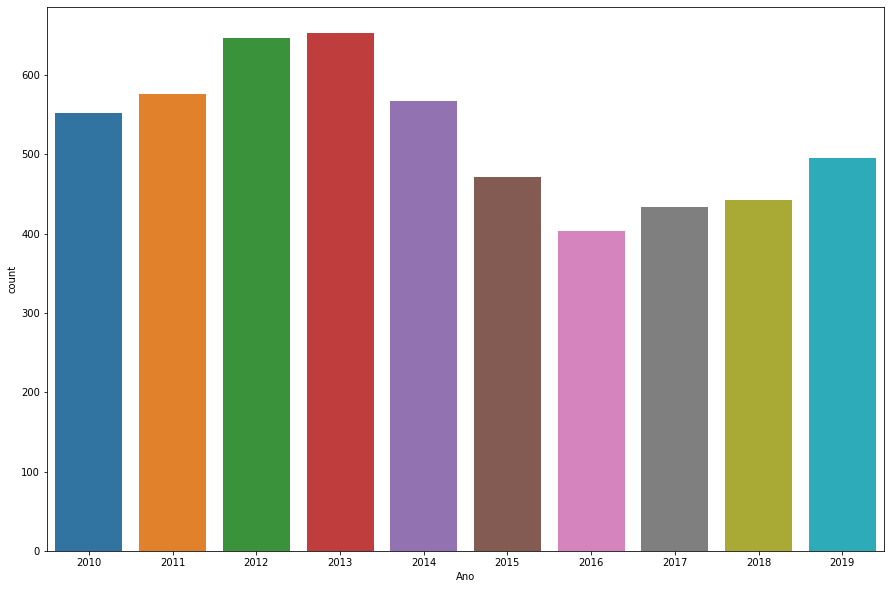

In [ ]:
figure()
countplot(data=acidentes_aereos,x='Ano')
show()

#10 fabricantes de aeronaves com maior quantidade de ocorrências

No gráfico abaixo é mostrado os fabricantes com maior número de ocorrências. A fabricante Cessna Aircraft lidera com 800 casos, portanto suas aeronaves foram avaliadas como as menos seguras; já a fabricante Aero Boero, dentre as 10 foi a que suas aeronaves apresentaram menos problemas.

Preparação dos dados:

In [ ]:
fabricantes = acidentes_aereos['aeronave_fabricante'].value_counts().head(10)


Visualização do gráfico:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

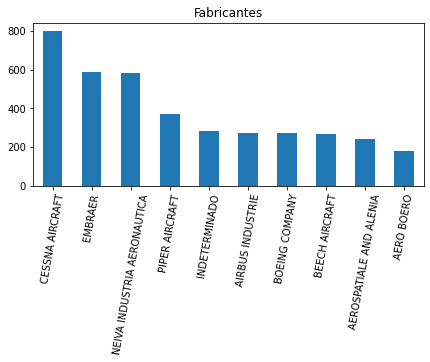

In [ ]:
fabricantes.plot(kind='bar', subplots=True, label="Fabricantes" ,figsize=(7, 3))
plt.xticks(rotation=80)

#Aeronaves com maior registro de ocorrências

No gráfico abaixo é mostrado que os aviões são os que têm registrado maior número de ocorrências (4213). Os helicópteros veem em seguida com 600, nem metade da primeira colocação. Já os balões, hidroaviões e dirigíveis foram os que menos registraram ocorrências.

Preparação dos dados:

In [ ]:
tipo_aero = acidentes_aereos['aeronave_tipo'].value_counts().head(10)

Visualização do gráfico:

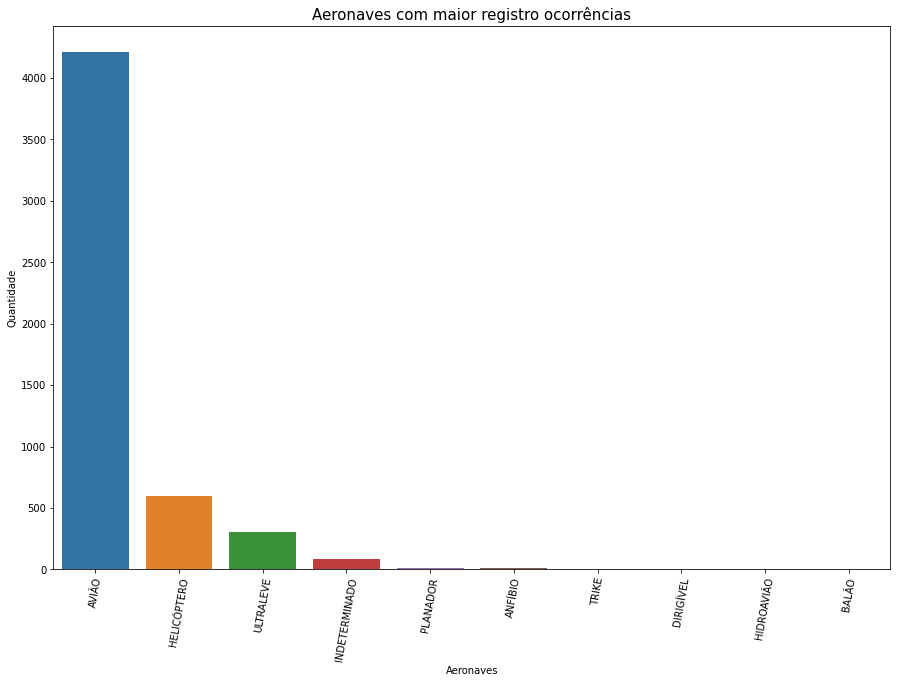

In [ ]:
figure()
countplot(data=acidentes_aereos,x='aeronave_tipo', order = acidentes_aereos['aeronave_tipo'].value_counts().index)
plt.xticks(rotation=80)
plt.title('Aeronaves com maior registro ocorrências', fontdict={'fontsize': 15})
plt.xlabel('Aeronaves')
plt.ylabel('Quantidade')
show()

Média, moda, media e desvio padrão dos tipos de aeronaves e suas ocorrências:

In [ ]:
tipo_aero.describe()

count      10.000000
mean      524.200000
std      1310.816946
min         1.000000
25%         2.000000
50%        13.500000
75%       252.500000
max      4213.000000
Name: aeronave_tipo, dtype: float64

#Ocorrências por região do Brasil

O gráfico abaixo mostra a diferença entre incidentes e acidentes ocorridas por cada região do Brasil. Os Acidentes são registrados com maior frequência, e o Sudeste é a região do Brasil que registrou maiores ocorrências aéras (1462 incidentes e 563 acidentes).

Preparação dos dados:

In [ ]:
def tem_numero(string): 
  return any(char.isdigit() for char in string)

def remove_repetidos(array): 
    l = []
    for i in array:
        if i not in l:
            l.append(i)
    l.sort()
    return l

def numero_em_cima(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

Visualização do total de ocorrências nas regiões:

In [ ]:
dic_regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
                'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
                'Centro Oeste': ['MT', 'MS', 'GO'], 
                'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
                'Sul': ['PR', 'RS', 'SC']}
tipos = ['ACIDENTE','INCIDENTE']
dic_01 = {i: [ len([k for k in list(acidentes_aereos.loc[acidentes_aereos['tipo'] == i, ['estado']]['estado'])
                    if k in dic_regioes[j]]) for j in dic_regioes.keys()] for i in tipos}

dic_01['tipo'] = list(dic_regioes.keys())
dados_regioes = pd.DataFrame(dic_01)
dados_regioes

,ACIDENTE,INCIDENTE,tipo
0,166,310,Nordeste
1,259,316,Norte
2,344,218,Centro Oeste
3,563,1462,Sudeste
4,355,474,Sul


Visualização do gráfico:

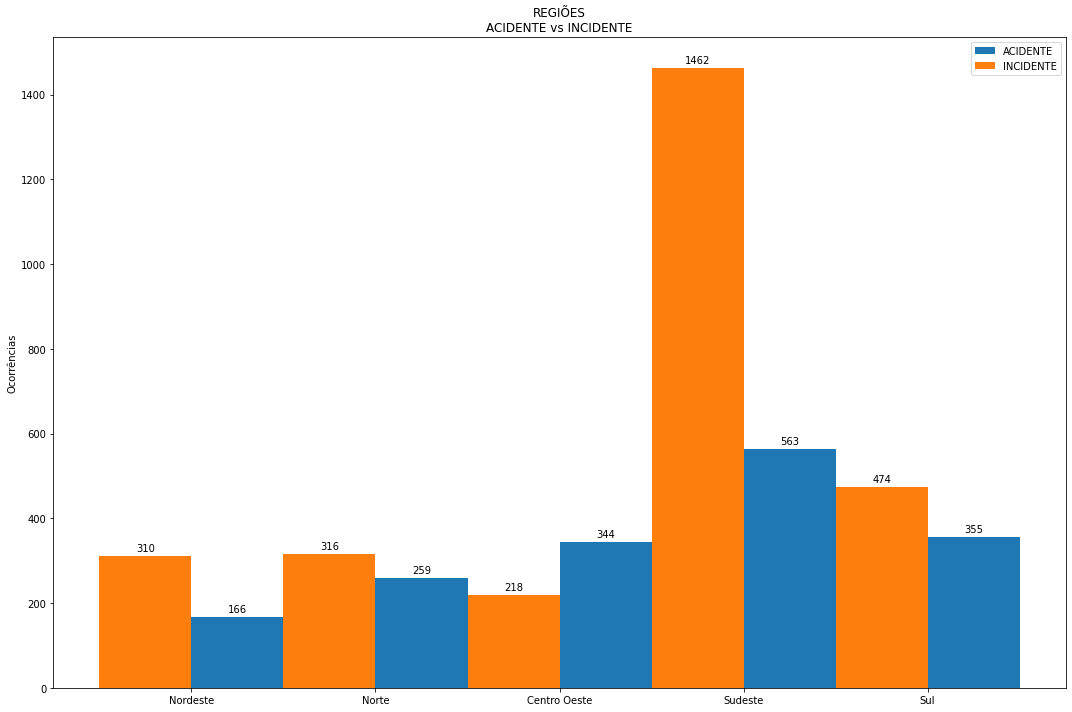

In [ ]:
x = np.arange(5)
width = 0.5

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, dados_regioes['ACIDENTE'], width, label='ACIDENTE')
rects2 = ax.bar(x - width/2, dados_regioes['INCIDENTE'], width, label='INCIDENTE')

ax.set_ylabel('Ocorrências')
ax.set_title('REGIÕES\nACIDENTE vs INCIDENTE')
ax.set_xticks(x)
ax.set_xticklabels(dados_regioes['tipo'])
ax.legend()

numero_em_cima(rects1, ax)
numero_em_cima(rects2, ax)


fig.tight_layout()

plt.show()



Média, moda, media e desvio padrão das ocorrências regionais:

In [ ]:
dados_regioes.describe()

,ACIDENTE,INCIDENTE
count,5.000000,5.000000
mean,337.400000,556.000000
std,147.286456,514.762081
min,166.000000,218.000000
25%,259.000000,310.000000
50%,344.000000,316.000000
75%,355.000000,474.000000
max,563.000000,1462.000000


# 10 cidades com maior número de ocorrências aéreas

O gráfico abaixo mostra as 10 cidades do Brasil que mais ocorreram ocorrências aéreas. Rio de Janeiro foi a cidade com maior número de casos (293), seguido de São Paulo (252); já Porto Alegre foi a cidade com menor número de casos (94) dentre as 10.

Visualização do total de ocorrências nas 10 cidades:

In [ ]:
cidade = acidentes_aereos['cidade'].value_counts().head(10)
cidade

RIO DE JANEIRO    293
SÃO PAULO         252
BELO HORIZONTE    174
GUARULHOS         141
GOIÂNIA           132
BRASÍLIA          129
LONDRINA          126
CAMPINAS          123
MANAUS             95
PORTO ALEGRE       94
Name: cidade, dtype: int64

Visualização do gráfico:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

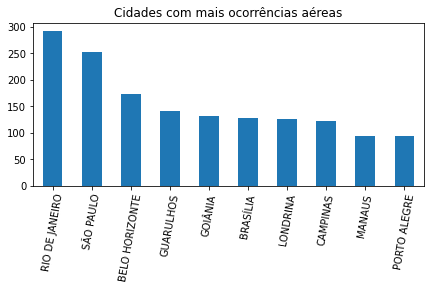

In [ ]:
cidade.plot(kind='bar', subplots=True, label="Cidades com mais ocorrências aéreas" ,figsize=(7, 3))
plt.xticks(rotation=80)

Média, moda, media e desvio padrão das 10 cidades com mais ocorrências aéreas:

In [ ]:
cidade.describe()

count     10.000000
mean     155.900000
std       66.158816
min       94.000000
25%      123.750000
50%      130.500000
75%      165.750000
max      293.000000
Name: cidade, dtype: float64

# Ocorrências por liberação da aeronave

O gráfico mostra as aeronaves que foram ou não liberadas para voo. Foi registrado que 2687 aeronaves foram liberadas para voo, seguido de 2419 que teve a liberação indeterminada. Apenas 136 aeronaves não tinham sido liberadas para voo.

 Preparação dos dados:

In [ ]:
liberacao = acidentes_aereos['aeronave_liberada'].value_counts().head(10)

Visualização do gráfico:

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

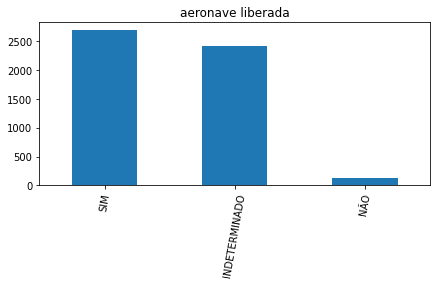

In [ ]:
liberacao.plot(kind='bar', subplots=True, label="aeronave liberada" ,figsize=(7, 3))
plt.xticks(rotation=80)

Média, moda, media e desvio padrão das aeronaves inspecionadas:

In [ ]:
liberacao.describe()

count       3.000000
mean     1747.333333
std      1401.874578
min       136.000000
25%      1277.500000
50%      2419.000000
75%      2553.000000
max      2687.000000
Name: aeronave_liberada, dtype: float64

# 10 Horários com maior ocorrências aéreas

No gráfico abaixo é mostrado os 10 horário onde mais tiveram ocorrências aéreas. Durante a noite foi registrado mais de 600 ocorrências aéreas, especificamente às 00:00, que ocorreu grande parte dessas ocorrências (160). O horário que menos registrou ocorrências aéreas, entre os 10 horários, foi na parte da manhã; em geral foi na parte da tarde às 18h.

Preparação dos dados:

In [ ]:
horario = acidentes_aereos['hora'].value_counts().head(10)

Visualização do gráfico:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

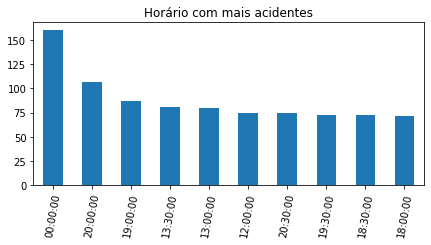

In [ ]:
horario.plot(kind='bar', subplots=True, label="Horário com mais acidentes" ,figsize=(7, 3))
plt.xticks(rotation=80)

#Como se encontra as investigações destas ocorrências?

No gráfico abaixo está sendo mostrado o status das investigações envolvendo os casos. Cerca de 4000 investigações já foram finalizadas por descobrirem a causa do acidente, entretanto, pouco menos de 1000 casos ainda seguem em aberto, e cerca de 400 seguem como causas indeterminadas.

Preparação dos dados:

In [ ]:
status = acidentes_aereos['status_investigacao'].value_counts().head(10)

Visualização do gráfico:

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

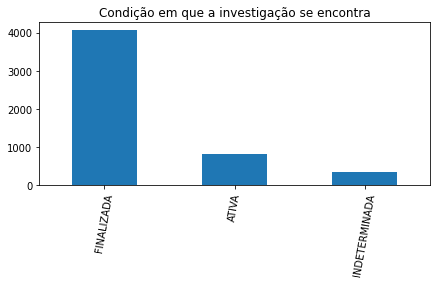

In [ ]:
status.plot(kind='bar', subplots=True, label="Condição em que a investigação se encontra" ,figsize=(7, 3))
plt.xticks(rotation=80)

Média, moda, media e desvio padrão do status de investigação:



In [ ]:
status.describe()

count       3.000000
mean     1747.333333
std      2020.926850
min       360.000000
25%       588.000000
50%       816.000000
75%      2441.000000
max      4066.000000
Name: status_investigacao, dtype: float64

# Todas as ocorrências aéreas foram durante o voo?

A resposta é não. No gráfico abaixo é comparado se o acidente/incidente da aeronave ocorreu na saída da pista ou se já estava no ar. De todos os registros, cerca de 4800 das ocorrências aconteceram já durante o voo; apenas 458 das ocorrências foram ainda na pista. 

Preparação dos dados:

In [ ]:
ocorrencia = acidentes_aereos['ocorrencia_saida_pista'].value_counts().head(10)

Visuzalição do gráfico:

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

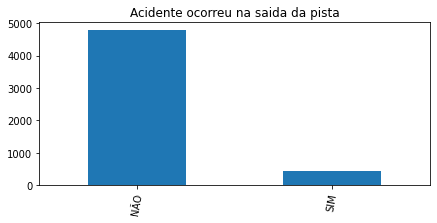

In [ ]:
ocorrencia.plot(kind='bar', subplots=True, label="Acidente ocorreu na saida da pista" ,figsize=(7, 3))
plt.xticks(rotation=80)

# Modelo do motor que ocasionou mais acidente/incidente

O gráfico abaixo mostra o motor que mais causou acidentes/incidentes. O motor do tipo Pistão foi que causou mais acidentes/incidentes com quase 3000 de registros, seguido do Jato com cerca de 1000 registros; já o Sem Tração foi o tipo de motor com menos registros de ocorrência, com apenas 15 registros.

Preparação dos dados:

In [ ]:
tipo_de_motor = acidentes_aereos['motor_tipo'].value_counts().head(6)
tipo_de_motor

PISTÃO           2952
JATO             1017
TURBOÉLICE        625
TURBOEIXO         501
INDETERMINADO     132
SEM TRAÇÃO         15
Name: motor_tipo, dtype: int64

Visualização do gráfico:

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

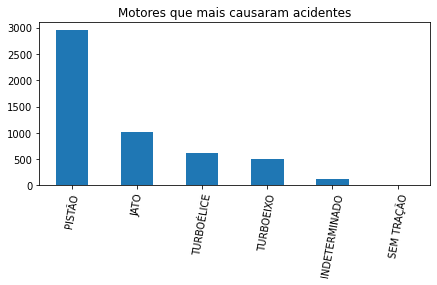

In [ ]:
tipo_de_motor.plot(kind='bar', subplots=True, label="Motores que mais causaram acidentes" ,figsize=(7, 3))
plt.xticks(rotation=80)

# Ano de fabricação das aeronaves com mais ocorrências

No gráfico abaixo é mostrado a quantidade de aeronaves que colidiram, de acordo o seu ano de fabricação. Cerca de 250 aeronaves fabricadas em 2008 foram registradas como ocorrência aérea, seguido das de 2010 com quase a mesma quantidade. As aeronaves fabricadas em 1979 foram as que menos sofreram algum tipo de ocorrência.

Preparação dos dados:

In [ ]:
ano_tratado =acidentes_aereos['aeronave_ano_fabricacao'].replace(0, method='bfill')

In [ ]:
ano_de_fabricacao = ano_tratado.value_counts().head(10)

Visuzalição do gráfico:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

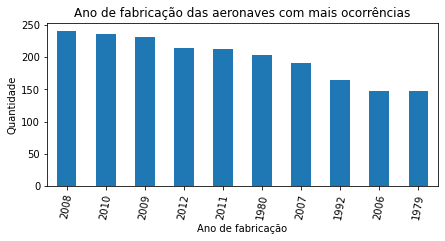

In [ ]:
ano_de_fabricacao.plot(kind='bar', subplots=True, label="Ano de fabricação das aeronaves com mais ocorrências" ,figsize=(7, 3))
plt.xlabel('Ano de fabricação')
plt.ylabel('Quantidade')
plt.xticks(rotation=80)

#Fase em que ocorreu os acidentes

No gráfico abaixo é mostrado o momento exato que os acidentes/incidentes aconteceram. A maioria aconteceu durante o Pouso da aeronave com 910 casos, seguido de problema na Decolagem, com cerca de 850 casos. A descida da aeronave foi a menor causadora de ocorrências dentre as 10 maiores citadas, com apenas 155 registros.

Preparação dos dados:

In [ ]:
fase_fabricacao = acidentes_aereos['aeronave_fase_operacao'].value_counts().head(10)

Visualização do gráfico:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

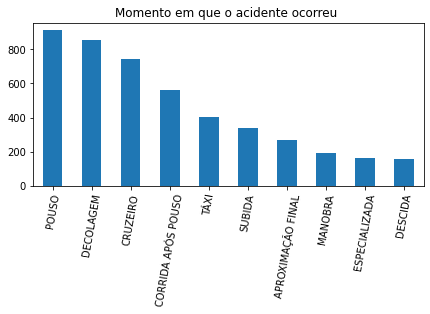

In [ ]:
fase_fabricacao.plot(kind='bar', subplots=True, label="Momento em que o acidente ocorreu " ,figsize=(7, 3))
plt.xticks(rotation=80)

Média, moda, media e desvio padrão das causas das ocorrências aéreas:

In [ ]:
fase_fabricacao.describe()

count     10.000000
mean     458.400000
std      289.777002
min      155.000000
25%      212.000000
50%      371.500000
75%      698.000000
max      910.000000
Name: aeronave_fase_operacao, dtype: float64

#Regressão linear da quantidade de assentos pelo ano do acidente

Analisando a regressão linear aplicada abaixo, entende-se que a média de quantidade de assentos em relação as ocorrências aéreas por ano tende a diminuir

In [ ]:
x = dados_acidentes_tratado.iloc[:, 18].values
y = dados_acidentes_tratado.iloc[:, 6].values

In [ ]:
correlacao = np.corrcoef(x, y)
x = x.reshape(-1, 1)

In [ ]:
regressor = LinearRegression()
regressor.fit(x, y)
regressor.coef_

array([-0.00129425])

Text(0, 0.5, 'Ano do acidente')

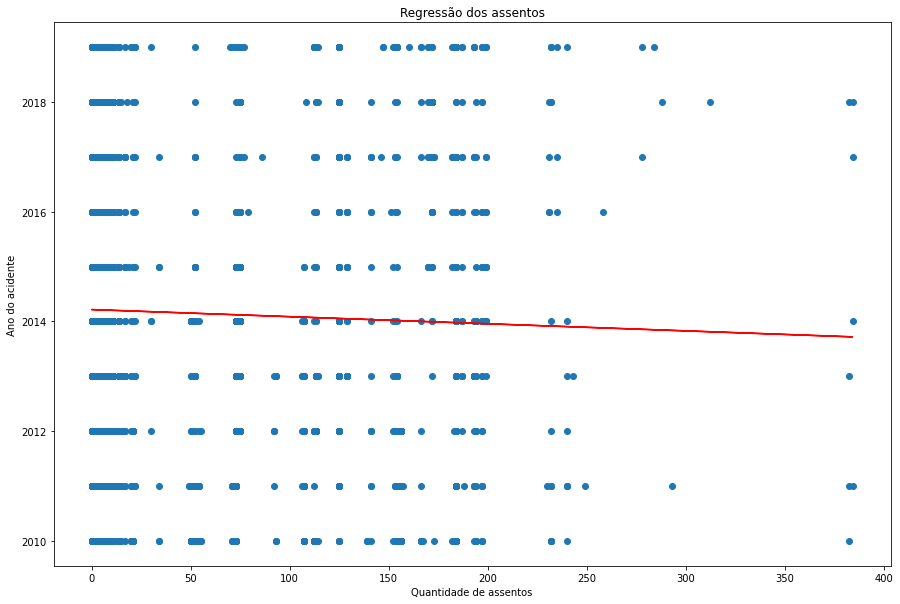

In [ ]:
plt.scatter(x, y)
plt.plot(x, regressor.predict(x), color = 'red')
plt.title('Regressão dos assentos')
plt.xlabel('Quantidade de assentos')
plt.ylabel('Ano do acidente')

#Conclusão

É fato que tem acontecido muitos acidentes em tão pouco tempo, visto que as viagens aéreas são consideradas as mais seguras. Mas por que o voo aéreo tem deixado de ser seguro assim? A resposta é que ela não deixou de ser segura, e sim, por falta de manutenções na aeronave, falha humana ou até mesmo a falta de qualidade na entrega das aeronaves são os causadores desses acidentes.

De acordo o estudo acima, analisando os fatos entre 2010 e 2019, o ano que teve mais acidentes foi em 2016, com mais de 600 acidentes. A maioria dos acidentes têm se dado por falhas mecânicas nos aviões. Vale lembrar que os motores que têm apresentado mais falhas são os fabricados no Brasil para aeronaves Monomotores e Bimotores. Em seguida, outro grande causador dos acidentes tem sido a falha humana, que tem se dado por perda de controle no pouso e durante o voo, colisão com obstáculos durante o pouso e durante a decolagem etc. Infelizmente o estado que mais tem sofrido com isso é São Paulo, seguido de Minas Gerais. 

Com isso chegamos a conclusão que, visto a tecnologia que nós temos hoje, falhas mecânicas e falhas humanas podiam ser cada vez mais evitadas com treinamentos da tripulação, aperfeiçoamento dos motores brasileiros e com uma melhor fiscalização das aeronaves.

#Referências bibliográficas

* A grab-bag of utility functions and objects. PyPi, 2021. Disponível em: https://pypi.org/project/utils/. Acesso em: 03 de Dezembro de 2021.

* An introduction to seaborn. Seaborn, 2012. Disponível em: https://towardsdatascience.com/seaborn-python-8563c3d0ad41. Acesso em: 18 de Novembro de 2021.

* Category Encoders. Category Encoders, 2016. Disponível em: https://contrib.scikit-learn.org/category_encoders/. Acesso em: 18 de Novembro de 2021.

* Getting Started. Plotly. Disponível em: https://plotly.com/python/. Acesso em: 18 de Novembro de 2021.

* Matplotlib Documentação. Matplotlib, 2021. Disponível em: https://matplotlib.org/stable/index.html#. Acesso em: 18 de Novembro de 2021.

* Visão geral do pacote. Pandas, 2011. Disponível em:https://pandas.pydata.org/docs/getting_started/overview.html. Acesso em: 18 de Novembro de 2021.

* Welcome to Python Utils’s documentation. Python Utils, 2021. Disponível em: https://pypi.org/project/python-utils/. Acesso em: 03 de Dezembro de 2021.

* Whats is NumPy?. Numpy, 2021. Disponível em: https://numpy.org/doc/stable/user/whatisnumpy.html. Acesso em: 18 de Novembro de 2021. 
